/home/romain/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


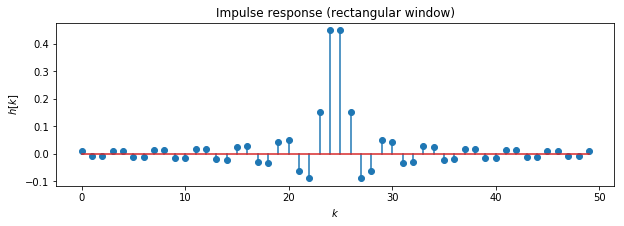

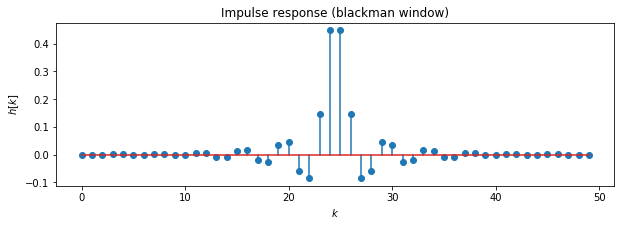

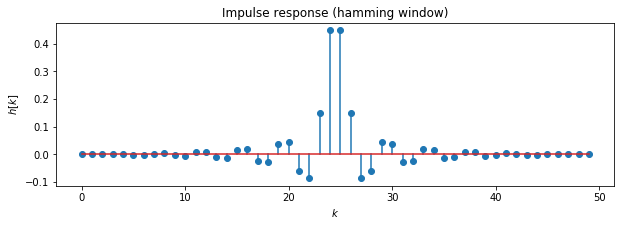

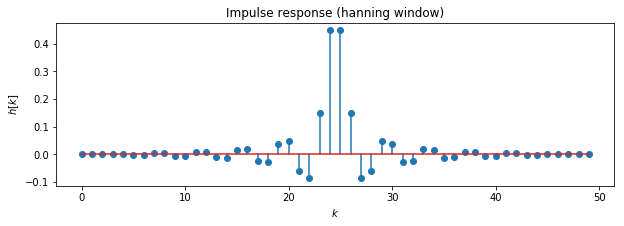

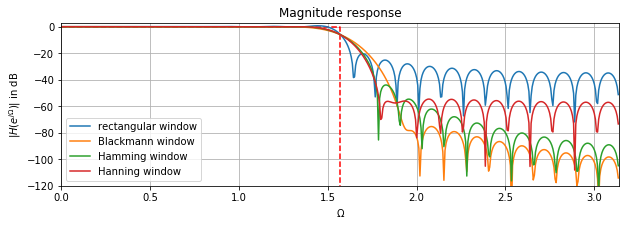

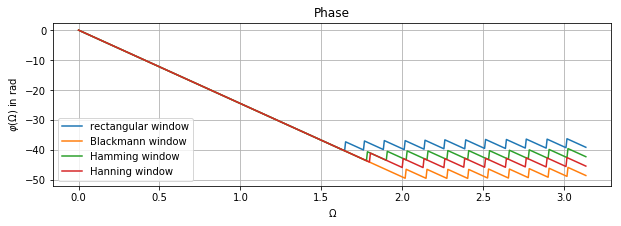

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

N = 50  # length of filter
Omc = np.pi/2

# compute impulse response
k = np.arange(N)
hd = Omc/np.pi * np.sinc((k-(N-1)/2)*Omc/np.pi)
# windowing
w1 = np.ones(N)
w2 = np.blackman(N)
w3 = np.hanning(N)
w4 = np.hamming(N)
h1 = hd * w1
h2 = hd * w2
h3 = hd * w3
h4 = hd * w4

# frequency responses
Om, H1 = signal.freqz(h1)
Om, H2 = signal.freqz(h2)
Om, H3 = signal.freqz(h3)
Om, H4 = signal.freqz(h4)

# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(h1)
plt.title('Impulse response (rectangular window)')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')

plt.figure(figsize=(10, 3))
plt.stem(h2)
plt.title('Impulse response (blackman window)')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')

plt.figure(figsize=(10, 3))
plt.stem(h3)
plt.title('Impulse response (hamming window)')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')

plt.figure(figsize=(10, 3))
plt.stem(h4)
plt.title('Impulse response (hanning window)')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')

# plot magnitude responses
plt.figure(figsize=(10, 3))
plt.plot([0, Omc, Omc], [0, 0, -300], 'r--')
plt.plot(Om, 20 * np.log10(abs(H1)), label='rectangular window')
plt.plot(Om, 20 * np.log10(abs(H2)), label='Blackmann window')
plt.plot(Om, 20 * np.log10(abs(H3)), label='Hamming window')
plt.plot(Om, 20 * np.log10(abs(H4)), label='Hanning window')
plt.title('Magnitude response')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
plt.axis([0, np.pi, -120, 3])
plt.legend(loc=3)
plt.grid()
# plot phase responses
plt.figure(figsize=(10, 3))
plt.plot(Om, np.unwrap(np.angle(H1)), label='rectangular window')
plt.plot(Om, np.unwrap(np.angle(H2)), label='Blackmann window')
plt.plot(Om, np.unwrap(np.angle(H3)), label='Hamming window')
plt.plot(Om, np.unwrap(np.angle(H4)), label='Hanning window')
plt.title('Phase')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi (\Omega)$ in rad')
plt.legend(loc=3)
plt.grid()
plt.show()

### Filter design with firwin

/home/romain/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


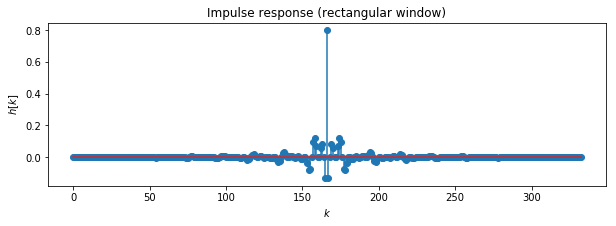

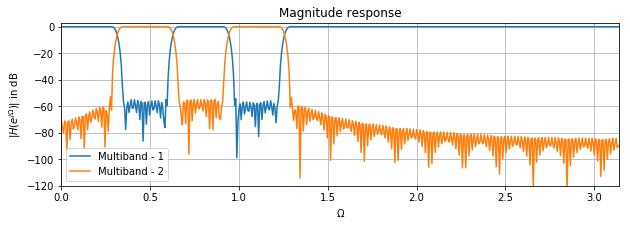

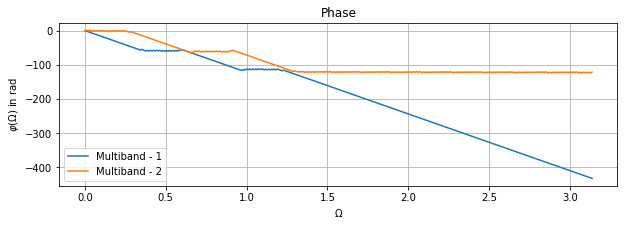

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

#help(signal.firwin)


numtaps=333


#  Multi-band (passbands are [0, f1], [f2, f3] and [f4, 1]):

f1, f2, f3, f4 = 0.1,0.2,0.3, 0.4
h1=signal.firwin(numtaps, [f1, f2, f3, f4])



# Multi-band (passbands are [f1, f2] and [f3,f4]):

h2= signal.firwin(numtaps, [f1, f2, f3, f4], pass_zero=False)






# frequency responses
Om, H1 = signal.freqz(h1)
Om, H2 = signal.freqz(h2)

# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(h1)
plt.title('Impulse response (rectangular window)')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
# plot magnitude responses
plt.figure(figsize=(10, 3))
plt.plot(Om, 20 * np.log10(abs(H1)), label='Multiband - 1')
plt.plot(Om, 20 * np.log10(abs(H2)), label='Multiband - 2')
plt.title('Magnitude response')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
plt.axis([0, np.pi, -120, 3])
plt.legend(loc=3)
plt.grid()
# plot phase responses
plt.figure(figsize=(10, 3))
plt.plot(Om, np.unwrap(np.angle(H1)), label='Multiband - 1')
plt.plot(Om, np.unwrap(np.angle(H2)), label='Multiband - 2')
plt.title('Phase')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi (\Omega)$ in rad')
plt.legend(loc=3)
plt.grid()
plt.show()

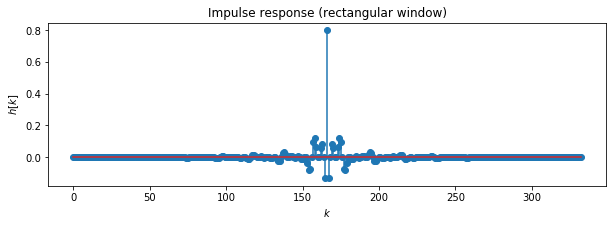

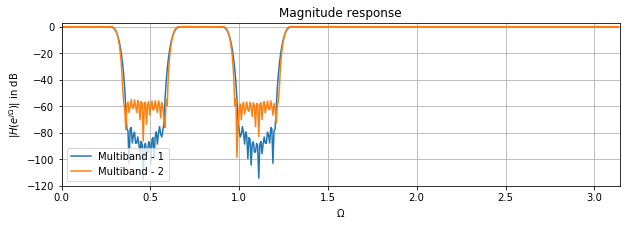

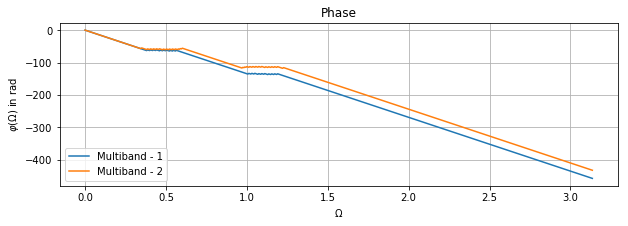

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal



numtaps=333


#  Multi-band (passbands are [0, f1], [f2, f3] and [f4, 1]):

f1, f2, f3, f4 = 0.1,0.2,0.3, 0.4
h1=signal.firwin(numtaps, [f1, f2, f3, f4],window="blackman")



# Multi-band (passbands are [f1, f2] and [f3,f4]):

h2= signal.firwin(numtaps, [f1, f2, f3, f4])






# frequency responses
Om, H1 = signal.freqz(h1)
Om, H2 = signal.freqz(h2)

# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(h1)
plt.title('Impulse response (rectangular window)')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
# plot magnitude responses
plt.figure(figsize=(10, 3))
plt.plot(Om, 20 * np.log10(abs(H1)), label='Multiband - 1')
plt.plot(Om, 20 * np.log10(abs(H2)), label='Multiband - 2')
plt.title('Magnitude response')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
plt.axis([0, np.pi, -120, 3])
plt.legend(loc=3)
plt.grid()
# plot phase responses
plt.figure(figsize=(10, 3))
plt.plot(Om, np.unwrap(np.angle(H1)), label='Multiband - 1')
plt.plot(Om, np.unwrap(np.angle(H2)), label='Multiband - 2')
plt.title('Phase')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi (\Omega)$ in rad')
plt.legend(loc=3)
plt.grid()
plt.show()

### Filter design with Kaiser window (and taking Fs into account)

We will use the Kaiser window method to design a lowpass FIR filter for a signal that is sampled at 1000 Hz.

We want at least 65 dB rejection in the stop band, and in the pass band the gain should vary no more than 0.5%.

We want a cutoff frequency of 175 Hz, with a transition between the pass band and the stop band of 24 Hz. That is, in the band [0, 163], the gain varies no more than 0.5%, and in the band [187, 500], the signal is attenuated by at least 65 dB.

The Kaiser method accepts just a single parameter to control the pass band ripple and the stop band rejection, so we use the more restrictive of the two. In this case, the pass band ripple is 0.005, or 46.02 dB, so we will use 65 dB as the design parameter.



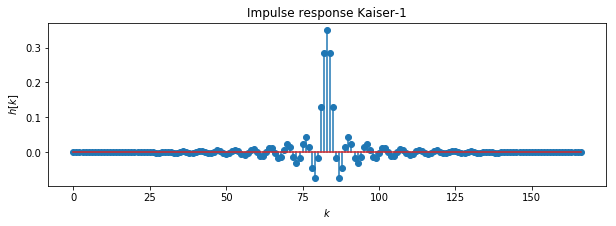

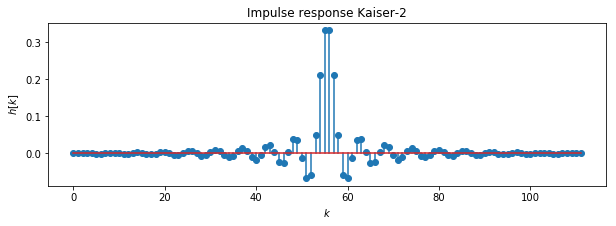

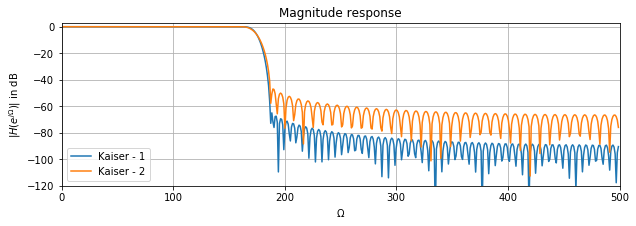

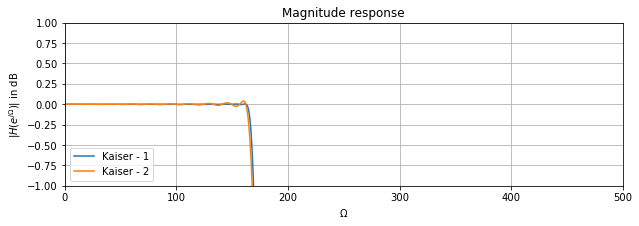

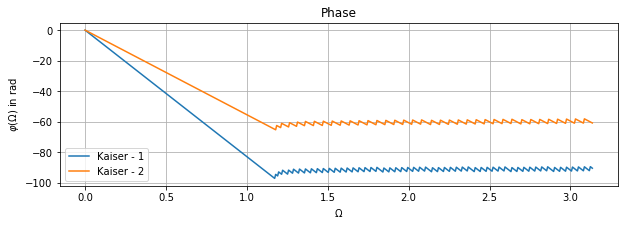

In [44]:
fs = 1000.0
# cutoff frequency
cutoff = 175
#transition width in Hz
width = 24
# attenuation in dB
attenuation = 65 

numtaps, beta = signal.kaiserord(65, width/(0.5*fs))
numtaps2,beta2=signal.kaiserord(46,width/(0.5*fs))
h1 = signal.firwin(numtaps, cutoff, window=('kaiser', beta), scale=False, nyq=0.5*fs)

h2 = signal.firwin(numtaps2, cutoff, window=('kaiser', beta2), scale=False, nyq=0.5*fs)

# frequency responses
Om, H1 = signal.freqz(h1)
Om, H2 = signal.freqz(h2)

# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(h1)
plt.title('Impulse response Kaiser-1')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')

# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(h2)
plt.title('Impulse response Kaiser-2')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
# plot magnitude responses
plt.figure(figsize=(10, 3))
plt.plot(Om*fs/2/np.pi, 20 * np.log10(abs(H1)), label='Kaiser - 1')
plt.plot(Om*fs/2/np.pi, 20 * np.log10(abs(H2)), label='Kaiser - 2')
plt.title('Magnitude response')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
plt.axis([0, np.pi*fs/2/np.pi, -120, 3])
plt.legend(loc=3)
plt.grid()

# plot magnitude responses
plt.figure(figsize=(10, 3))
plt.plot(Om*fs/2/np.pi, 20 * np.log10(abs(H1)), label='Kaiser - 1')
plt.plot(Om*fs/2/np.pi, 20 * np.log10(abs(H2)), label='Kaiser - 2')
plt.title('Magnitude response')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
plt.axis([0, np.pi*fs/2/np.pi, -1, 1])
plt.legend(loc=3)
plt.grid()
# plot phase responses
plt.figure(figsize=(10, 3))
plt.plot(Om, np.unwrap(np.angle(H1)), label='Kaiser - 1')
plt.plot(Om, np.unwrap(np.angle(H2)), label='Kaiser - 2')
plt.title('Phase')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi (\Omega)$ in rad')
plt.legend(loc=3)
plt.grid()
plt.show()

### Filter design with the Remez algorithm 

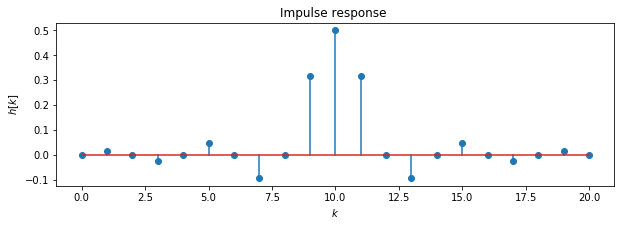

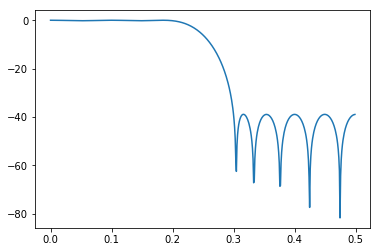

In [66]:
#help(signal.remez)
lpf = signal.remez(21, [0, 0.2, 0.3, 0.5], [1.0, 0.0])
# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(lpf)
plt.title('Impulse response ')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
w, h = signal.freqz(lpf)
plt.figure()

plt.plot(w/(2*np.pi), 20*np.log10(np.abs(h)))
plt.show()

## Example 
Generate a noisy signal to be filtered:

In [39]:
import IPython

from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + np.random.randn(len(t)) * 0.08

#IPython.display.Audio(xn[::], rate=50)

Create an order 3 lowpass butterworth filter:


In [14]:
b, a = signal.butter(3, 0.05)
print(b)
print(a)

[0.00041655 0.00124964 0.00124964 0.00041655]
[ 1.         -2.6861574   2.41965511 -0.73016535]


Apply the filter to xn. Use lfilter_zi to choose the initial condition of the filter:


In [15]:
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

Apply the filter again, to have a result filtered at an order the same as filtfilt:


In [16]:
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

Use filtfilt to apply the filter:


In [17]:
y = signal.filtfilt(b, a, xn)

/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


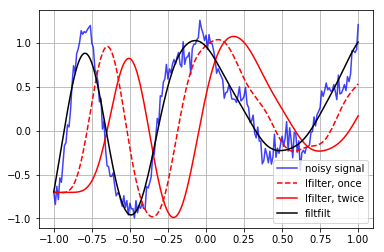

In [18]:
plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [114]:
def plotiir(a,b,title,fs):
    # frequency responses
    Om, H1 = signal.freqz(b,a)
    dt,h1=signal.dimpulse([b,a,1])
    h1=np.reshape(h1,100)
    # plot impulse response
    plt.figure(figsize=(10, 3))
    plt.stem(np.reshape(h1,100))
    plt.title('Impulse response '+title)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$h[k]$')

    # plot magnitude responses
    plt.figure(figsize=(10, 3))
    plt.plot(Om*fs/2/np.pi, 20 * np.log10(abs(H1)), label=title)
    plt.title('Magnitude response' + title)
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
    plt.axis([0, np.pi*fs/2/np.pi, -120, 3])
    plt.legend(loc=3)
    plt.grid()

    # plot phase responses
    plt.figure(figsize=(10, 3))
    plt.plot(Om, np.unwrap(np.angle(H1)), label=title)
    plt.title('Phase' + title)
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$\varphi (\Omega)$ in rad')
    plt.legend(loc=3)
    plt.grid()
    plt.show()


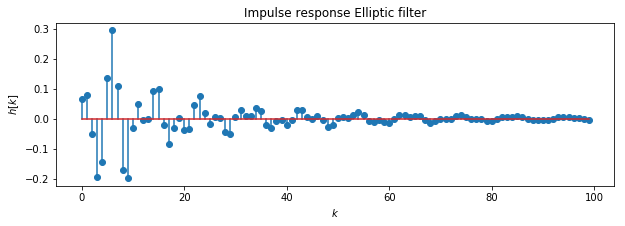

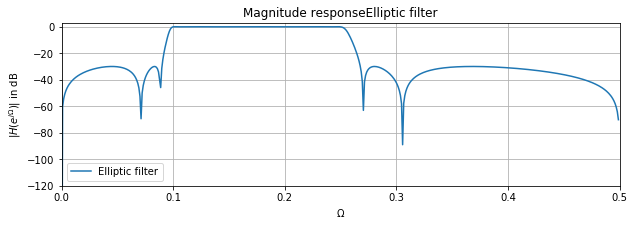

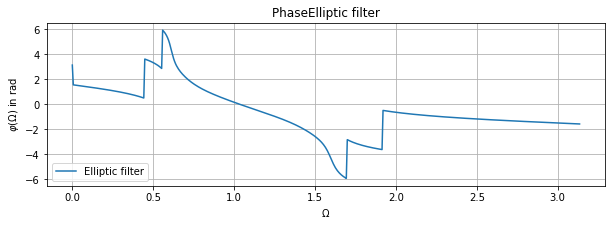

(11,) (11,)


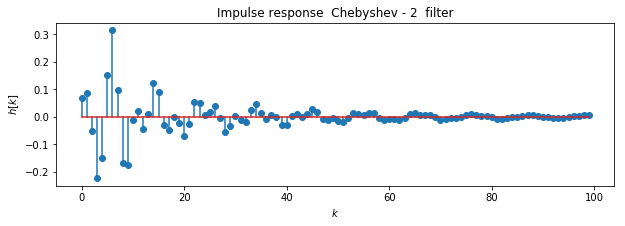

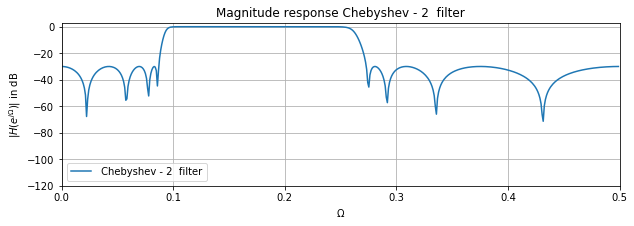

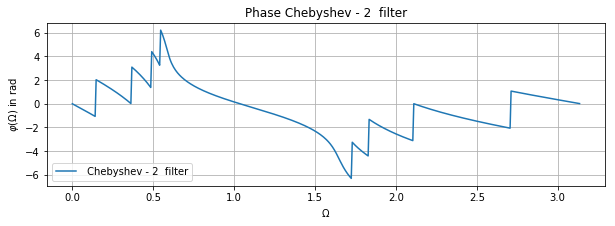

(17,) (17,)


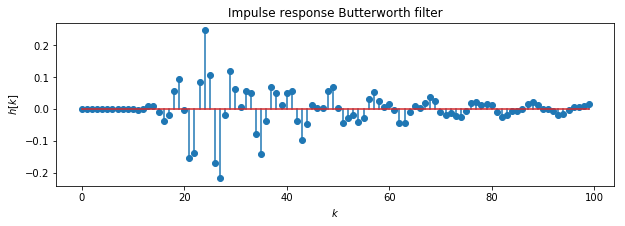

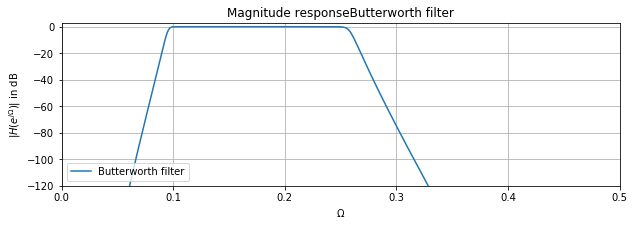

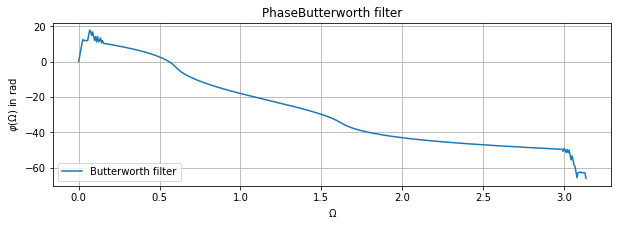

(41,) (41,)


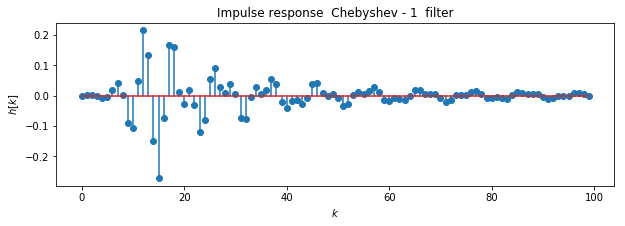

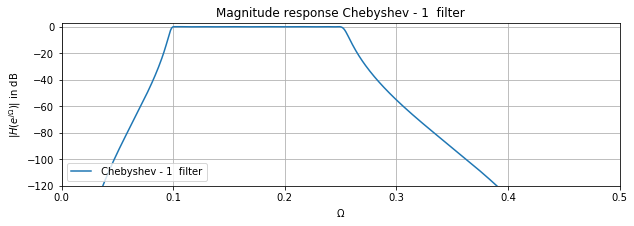

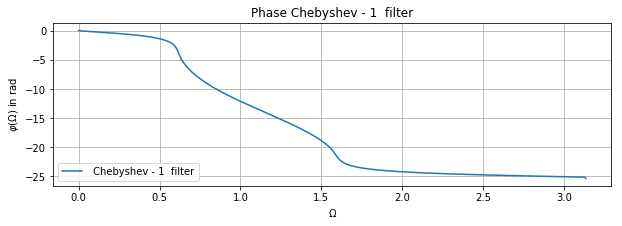

(17,) (17,)


/anaconda/lib/python3.6/site-packages/scipy/signal/filter_design.py:1452: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


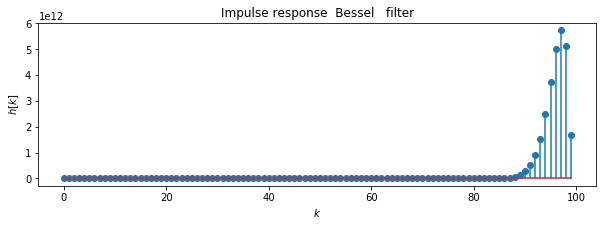

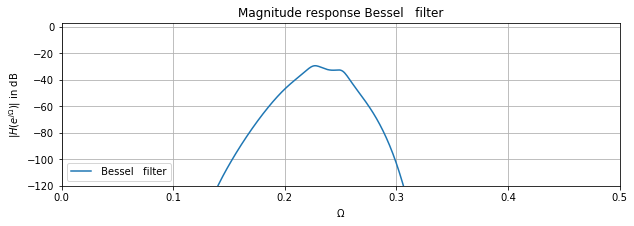

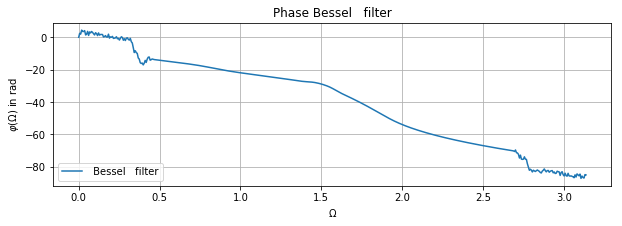

(91,) (91,)


In [115]:
#help(signal.iirdesign)

wp = np.array([0.2, 0.5])
ws = np.array([0.15, 0.55])

gpass = 0.1
gstop = 30.0
fs=1

b,a=(signal.iirdesign(wp, ws, gpass, gstop, ftype='ellip', output='ba'))
plotiir(a,b,'Elliptic filter',fs)
print(np.shape(a),np.shape(b))

b,a=(signal.iirdesign(wp, ws, gpass, gstop, ftype='cheby2', output='ba'))
plotiir(a,b,' Chebyshev - 2  filter',fs)
print(np.shape(a),np.shape(b))

b,a=(signal.iirdesign(wp, ws, gpass, gstop, ftype='butter', output='ba'))
plotiir(a,b,'Butterworth filter',fs)
print(np.shape(a),np.shape(b))

b,a=(signal.iirdesign(wp, ws, gpass, gstop, ftype='cheby1', output='ba'))
plotiir(a,b,' Chebyshev - 1  filter',fs)
print(np.shape(a),np.shape(b))

b,a=(signal.iirfilter(45, ws, gpass, btype='bandpass', ftype='bessel', output='ba'))
plotiir(a,b,' Bessel   filter',fs)
print(np.shape(a),np.shape(b))


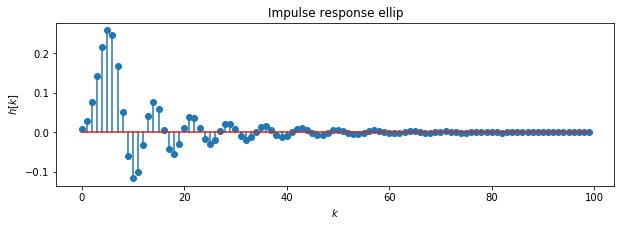

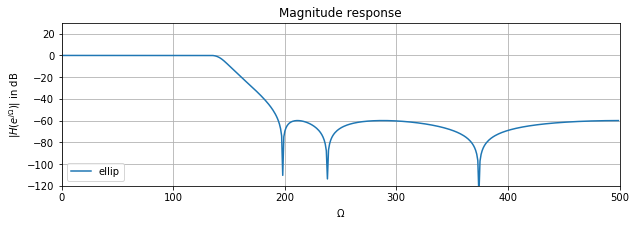

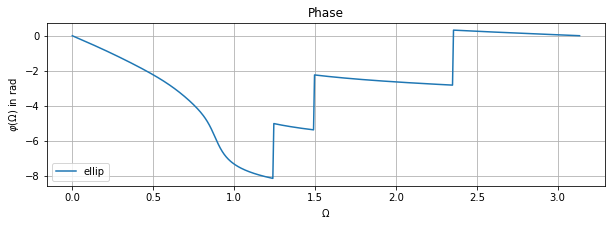

In [94]:
# Specification for our filter
Wp = 0.270   # end of passband, normalized frequency
Ws = 0.412   # start of the stopband, normalized frequency 
Rp = 0.1     # passband maximum loss (gpass)
As = 60      # stoppand min attenuation (gstop)

Filters = {'ellip' : (), 'cheby2' : (), 'butter' : (), 
           'cheby1' : (), 'bessel' : ()}

# The ellip and cheby2 filter design
a,b= signal.iirdesign(Wp, Ws, Rp, As, ftype='ellip')
plotiir(b,a,'ellip')
Filters['cheby2'] = signal.iirdesign(Wp, Ws, Rp, As, ftype='cheby2')

# The butter and cheby1 need less constraint spec
Rpl = Rp*10; Asl = As/4.
Filters['butter'] = signal.iirdesign(Wp, Ws, Rp, As, ftype='butter')
Filters['cheby1'] = signal.iirdesign(Wp, Ws, Rp, As, ftype='cheby1')

# The bessel max order of 8 for this cutoff, can't use
# iirdesign have to use iirfilter.
Filters['bessel'] = signal.iirfilter(8, Wp, btype='lowpass', ftype='bessel')
